In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
from python_speech_features import mfcc ,logfbank
from scipy.io import wavfile
import csv
from tqdm import tqdm

In [2]:
def plot_signal(signals):
    fig ,axes=plt.subplots(nrows=1,ncols=2,sharex=False,
                          sharey=True,figsize=(20,5))
    fig.suptitle('time series',size=16)
    i=0
    for y in range(2):
        axes[y].set_title(list(signals.keys())[i])
        axes[y].plot(list(signals.values())[i])
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1 

In [3]:
def plot_fft(fft):
    fig ,axes=plt.subplots(nrows=1,ncols=2,sharex=False,
                          sharey=True,figsize=(20,5))
    fig.suptitle('fourier transform',size=16)
    i=0
    for y in range(2):
        data=list(fft.values())[i]
        Y,freq=data[0],data[1]
        axes[y].set_title(list(fft.keys())[i])
        axes[y].plot(freq,Y)
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1



In [4]:
def plot_mfcc(mfccs):
    fig ,axes=plt.subplots(nrows=1,ncols=2,sharex=False,
                          sharey=True,figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients',size=16)
    i=0
    for y in range(2):
        axes[y].set_title(list(mfccs.keys())[i])
        axes[y].imshow(list(mfccs.values())[i],
                            cmap='hot',interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1

In [5]:
def plot_fbank(fbank):
    fig ,axes=plt.subplots(nrows=1,ncols=2,sharex=False,
                          sharey=True,figsize=(20,5))
    fig.suptitle('Filte Bank Coefficients',size=16)
    i=0
    for y in range(2):
        axes[y].set_title(list(fbank.keys())[i])
        axes[y].imshow(list(fbank.values())[i],
                            cmap='hot',interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1


In [6]:
# path='wavfiles/'
# instrument='instrument.csv'

# header='filename label'
# header=header.split()
# file = open(instrument, 'w')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)

    

# for files in os.listdir(path):
#     temp=path+files+'/'
#     for audio in os.listdir(temp):
#         temp2=[temp+audio]
#         temp2.append(files)
#         file = open(instrument, 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(temp2)
    

In [40]:
df=pd.read_csv('audio_without_pitch.csv')
df.set_index('filename',inplace=True)
# df['label']=df['label'].apply(lambda x :'healthy' if (x==0)   else "covid")
df

,label
filename,
neg-0421-083-cough-m-53-0.wav,healthy
neg-0421-083-cough-m-53-1.wav,healthy
neg-0421-083-cough-m-53-10.wav,healthy
neg-0421-083-cough-m-53-11.wav,healthy
neg-0421-083-cough-m-53-12.wav,healthy
...,...
pos-0422-096-cough-m-31-1.wav,covid
pos-0422-096-cough-m-31-2.wav,covid
pos-0422-096-cough-m-31-6.wav,covid


In [8]:
# df.to_csv('pitch_audio_label.csv',index=True)

In [41]:
for f in df.index:
    rate,signal=wavfile.read('without_pitch_audio/'+f)
    df.at[f,'length']=signal.shape[0]/rate
classes=list(np.unique(df.label))
class_dist=df.groupby(['label'])['length'].mean()
class_dist, classes

(label
 covid      3.844563
 healthy    3.470218
 Name: length, dtype: float64,
 ['covid', 'healthy'])

In [42]:
df

,label,length
filename,,
neg-0421-083-cough-m-53-0.wav,healthy,1.599909
neg-0421-083-cough-m-53-1.wav,healthy,1.599909
neg-0421-083-cough-m-53-10.wav,healthy,1.599955
neg-0421-083-cough-m-53-11.wav,healthy,1.599909
neg-0421-083-cough-m-53-12.wav,healthy,1.599909
...,...,...
pos-0422-096-cough-m-31-1.wav,covid,1.599955
pos-0422-096-cough-m-31-2.wav,covid,1.599864
pos-0422-096-cough-m-31-6.wav,covid,1.599909


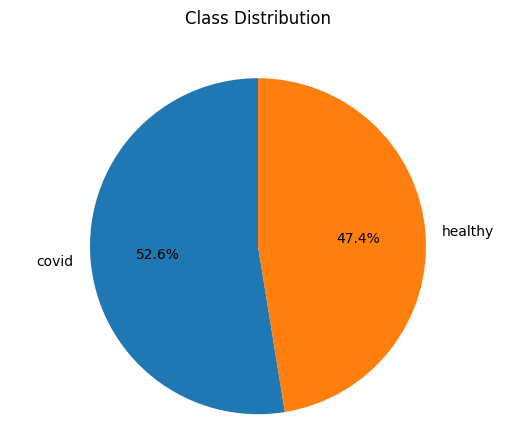

In [43]:
fig ,ax=plt.subplots()
ax.set_title("Class Distribution",y=1.08)
ax.pie(class_dist,labels=class_dist.index,autopct='%1.1f%%',
       shadow=False,startangle=90)
ax.axis('equal')
plt.show()

In [44]:
df.reset_index(inplace=True)
df

,filename,label,length
0,neg-0421-083-cough-m-53-0.wav,healthy,1.599909
1,neg-0421-083-cough-m-53-1.wav,healthy,1.599909
2,neg-0421-083-cough-m-53-10.wav,healthy,1.599955
3,neg-0421-083-cough-m-53-11.wav,healthy,1.599909
4,neg-0421-083-cough-m-53-12.wav,healthy,1.599909
...,...,...,...
132,pos-0422-096-cough-m-31-1.wav,covid,1.599955
133,pos-0422-096-cough-m-31-2.wav,covid,1.599864
134,pos-0422-096-cough-m-31-6.wav,covid,1.599909
135,pos-0422-096-cough-m-31-8.wav,covid,1.599909


In [12]:
def calc_fft(y, rate):
    n=len(y)
    freq=np.fft.rfftfreq(n,d=1/rate)
    Y=abs(np.fft.rfft(y)/n)
    return (Y,freq)


def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/20),
                       min_periods=1,
                       center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask


In [24]:
signals={}
fft={}
fbank={}
mfccs={}

for c in classes:
    wav_file=df[df['label']==c].iloc[0,0]

    # if c == "healthy":
    #     path_xy = 'neg-0422-095-cough-m-53-4.wav'
    # else:
    #     path_xy = 'pos-0421-086-cough-m-65-5.wav'
   
        
    # signal ,rate=librosa.load('without_pitch_audio/'+path_xy,sr=16000) 
    signal ,rate=librosa.load('without_pitch_audio/'+wav_file,sr=16000) 
    # signal ,rate=librosa.load('sample.wav',sr=48000) 
    # rate,signal=wavfile.read('without_pitch_audio/'+wav_file) 
    mask=envelope(signal,rate,0.0005)
    signal=signal[mask]
    signals[c]=signal
    fft[c]=calc_fft(signal,rate)
    # bank= logfbank(signal[:rate],rate,nfilt=26,nfft=1103).T  #nfft=sr/40
    bank= logfbank(signal[:rate],rate,nfilt=26,nfft=1201).T  #nfft=sr/40
    fbank[c]=bank
    mel= mfcc(signal[:rate],rate,numcep=13,nfilt=26,nfft=1201).T  #nfft=sr/40
    mfccs[c]=mel
    # print(rate,signal)
    print(rate)

16000
16000


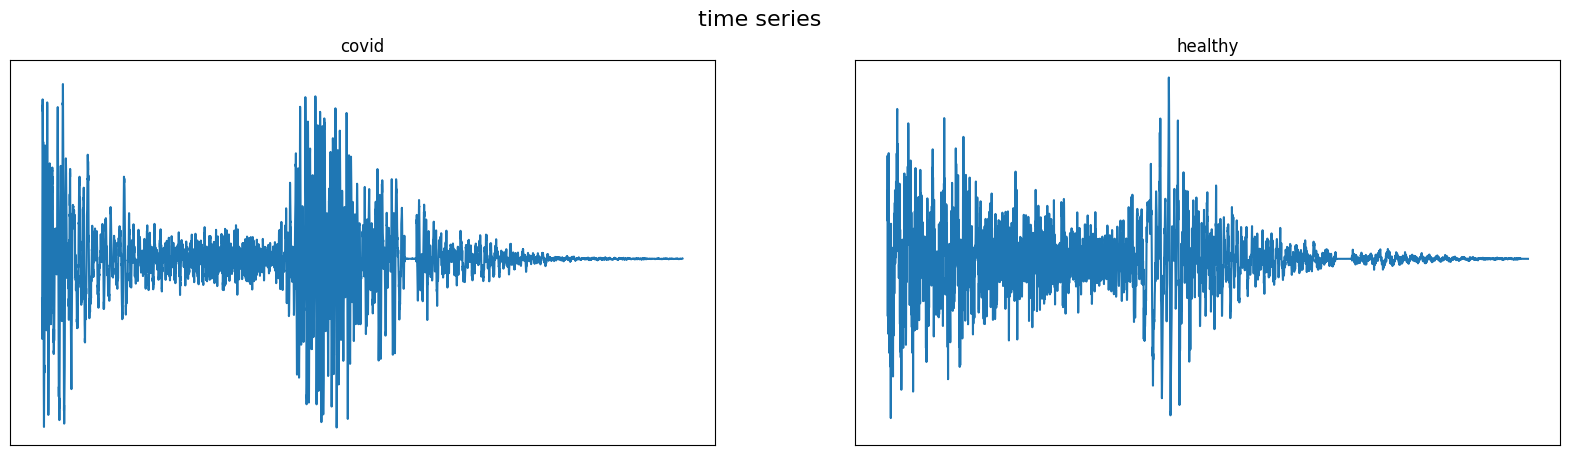

In [25]:
plot_signal(signals)
plt.show()
# list(signals.values())[0]
# plt.plot(list(signals.values())[0])

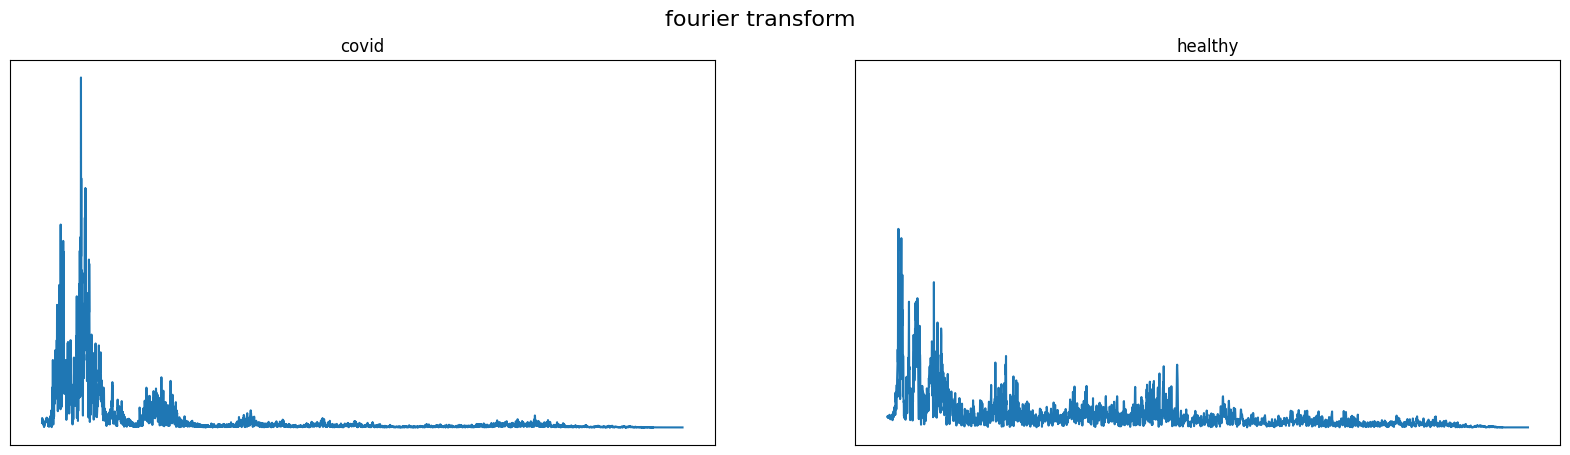

In [26]:
plot_fft(fft)

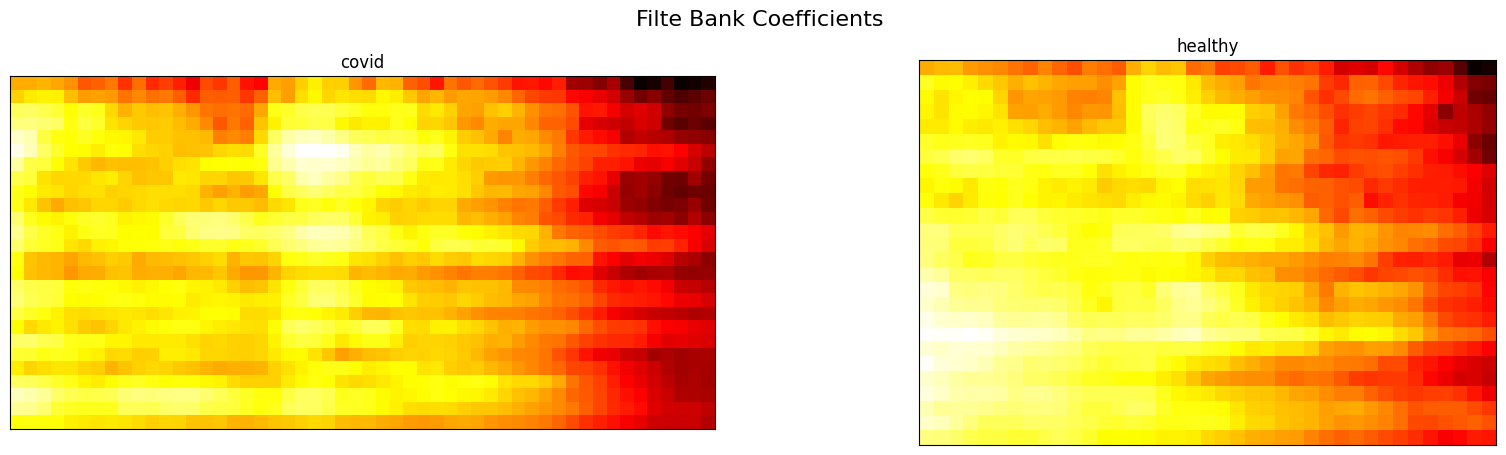

In [27]:
plot_fbank(fbank) 

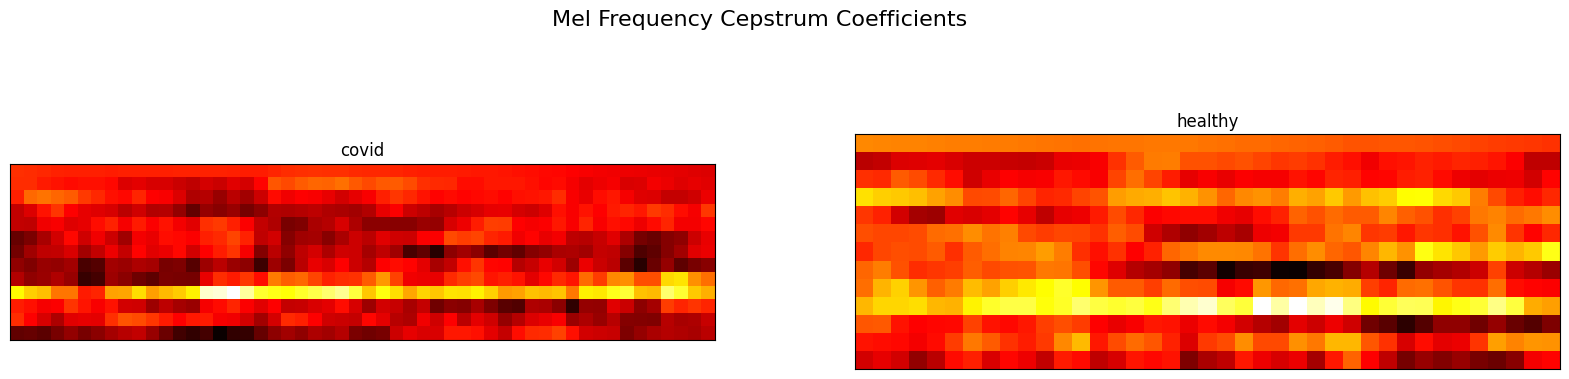

In [28]:
plot_mfcc(mfccs)

In [125]:
os.path.basename(df['filename'][0])
df['filename'][0]

'neg-0421-083-cough-m-53-0.wav'

In [227]:
if len(os.listdir('clean_pitched')) ==0 :
    for f in tqdm(df['filename']):
        signal,rate_x=librosa.load('pitched_audio/'+f,sr=16000)  # down sampling because thier not much data at higher freq 
        mask=envelope(signal,rate_x,0.0005)
        wavfile.write(filename='clean_pitched/'+ f,rate=rate_x,data=signal[mask])

100%|██████████| 137/137 [00:02<00:00, 58.21it/s]


In [ ]:
# label_path='audio_without_pitch.csv'
# header='filename label'
# header=header.split()
# file = open(label_path, 'w')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)
# neg_path='./clinical/segmented/neg/'
# pos_path='./clinical/segmented/pos/'
# for files in os.listdir(neg_path):
#     if files.endswith('.wav'):
#         path=neg_path+files
#         signal,rate_x=librosa.load(path) 
#         wavfile.write(filename='without_pitch_audio/'+ files,rate=rate_x,data=signal)
#         path=[str(files)]
#         path.extend([0])
#         file = open(label_path, 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(path)
# for files in os.listdir(pos_path):
#     if files.endswith('.wav'):
#         path=pos_path+files
#         signal,rate_x=librosa.load(path) 
#         wavfile.write(filename='without_pitch_audio/'+ files,rate=rate_x,data=signal)
#         path=[str(files)]
#         path.extend([1])
#         file = open(label_path, 'a')
#         with file:
#             writer = csv.writer(file)
#             writer.writerow(path)

In [44]:
signal,rate=librosa.load('sample.wav',sr=758) 
# rate,signal=wavfile.read('sample.wav')

# signal=signal[0:int(rate/10)]
# x=mfcc(signal,rate,numcep=13,
#                     nfilt=26,nfft=512)
# x.shape
signal.shape[0]/rate

2.9868073878627968

In [45]:
df = df.sample(frac = 1)
df.reset_index(inplace=True,drop=True)
df

,filename,label,length
0,neg-0421-083-cough-m-53-0.wav,healthy,1.599909
1,neg-0421-091-cough-m-47-4.wav,healthy,1.599864
2,pos-0421-086-cough-m-65-3.wav,covid,1.599909
3,pos-0421-092-cough-m-53-13.wav,covid,1.599864
4,neg-0421-089-cough-f-20-5.wav,healthy,1.599864
...,...,...,...
132,neg-0422-097-cough-m-37-9.wav,healthy,1.599909
133,neg-0421-089-cough-f-20-3.wav,healthy,1.599864
134,neg-0422-097-cough-m-37-8.wav,healthy,1.599909
135,neg-0422-095-cough-m-53-1.wav,healthy,1.599909


In [74]:
# int (df.shape[0]*0.8)
from sklearn.model_selection import train_test_split
y=df['label']
x=df.drop('label',axis=1)
x

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [75]:
# train_df=df.iloc[0:int (df.shape[0]*0.8)]
# train_df
train=pd.concat( [x_train,y_train],axis=1,)
test=pd.concat( [x_test,y_test],axis=1,)
train.reset_index(drop=True)

,filename,length,label
0,pos-0421-092-cough-m-53-7.wav,1.599864,covid
1,pos-0421-092-cough-m-53-0.wav,1.599909,covid
2,neg-0422-095-cough-m-53-13.wav,1.599909,healthy
3,neg-0422-098-cough-f-24-5.wav,1.599864,healthy
4,neg-0422-095-cough-m-53-7.wav,1.599909,healthy
...,...,...,...
104,neg-0421-088-cough-f-66-3.wav,1.599955,healthy
105,pos-0421-087-cough-f-40-0.wav,1.599909,covid
106,pos-0422-096-cough-m-31-8.wav,1.599909,covid
107,neg-0421-089-cough-f-20-3.wav,1.599864,healthy


In [69]:
# test_df=df.iloc[int(df.shape[0]*0.8):]
# test_df['label'].value_counts()
test['label'].value_counts()

label
healthy    17
covid      11
Name: count, dtype: int64